In [1]:
 import cv2
 import numpy as np 

In [2]:
 apple_path = 'apple.png'
 orange_path = 'orange.png'
 apple = cv2.imread(apple_path)
 apple = cv2.resize(apple,(512,512))
 orange = cv2.imread(orange_path) 
 orange = cv2.resize(orange,(512,512))  

In [3]:
 #printing the shape of our images
 print(apple.shape)
 print(orange.shape) 

(512, 512, 3)
(512, 512, 3)


In [4]:
 apple_orange = np.hstack((apple[:, :256], orange[:, 256:])) 
 #Dividing them into right and left half as tuples using hstack 

In [5]:
 import matplotlib.pyplot as plt
 plt.imshow( apple_orange[:, :, ::-1 ]) 

In [6]:
 # generate Gaussian pyramid for apple
 apple_copy = apple.copy()#create a copy of the apple image
 gp_apple = [apple_copy] #creating the gaussian pyramid and pass as a list
 for i in range(6):
     apple_copy = cv2.pyrDown(apple_copy)
     gp_apple.append(apple_copy)

In [7]:
 # generate Gaussian pyramid for orange
 orange_copy = orange.copy()
 gp_orange = [orange_copy]
 for i in range(6):
     orange_copy = cv2.pyrDown(orange_copy)
     gp_orange.append(orange_copy) 

In [8]:
 # generate Laplacian Pyramid for apple
 apple_copy = gp_apple[5]
 lp_apple = [apple_copy]
 for i in range(5, 0, -1):
     gaussian_expanded = cv2.pyrUp(gp_apple[i])
     laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
     lp_apple.append(laplacian)
 #Doing the same from orange, 
 # generate Laplacian Pyramid for orange
 orange_copy = gp_orange[5]
 lp_orange = [orange_copy]
 for i in range(5, 0, -1):
     gaussian_expanded = cv2.pyrUp(gp_orange[i])
     laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
     lp_orange.append(laplacian) 

In [9]:
 # Now add left and right halves of images in each level
 apple_orange_pyramid = []
 n = 0
 for apple_lap, orange_lap in zip(lp_apple, lp_orange):
     n += 1
     cols, rows, ch = apple_lap.shape
     laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))#dividing columns of both images into half
     apple_orange_pyramid.append(laplacian)#appending the variable to list 

In [10]:
 # now reconstructing our image using pyrUp and stating pyramid levels
 apple_orange_reconstruct = apple_orange_pyramid[0]
 for i in range(1, 6):
     apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
     apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct) 

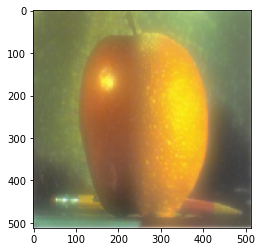

In [11]:
 #using -1 to maintain coloured saturation
 plt.imshow( apple_orange_reconstruct[:, :, ::-1 ])  